# Get SWE, Air Temp, and Precip from SNOTEL Stations
This code was adapted from scripts Amy D wrote and that were used in Reed's CEE306 course. 

- Gathers SNOTEL metadata
- Gathers SNOTEL variables SWE, Temp, and Precip from station

Notes:
- This currently is configured to only find data for one station, need to rewrite so that it gets SNOTEL data from multiple stations

In [1]:
# import libraries
from zeep import Client
from zeep import helpers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set WSDL Client file to zeep.Client object
# this retrieves the contents of the WSDL file, which contains 'instructions'
# on what types of methods and parameters are available from this Web Service
client = Client('https://wcc.sc.egov.usda.gov/awdbWebService/services?WSDL')

The variable `client` is now an object in the zeep package. We now use different methods (provided by zeep) to act on the `client` object for various tasks, such as retriving metadata or obtaining possible measurement sites.

In [3]:
# collect list of IDs for SNOTEL and SNOTEL-LITE stations?
# .service.getStations() is a method for getting the IDs for these stations in object 'client'
snotel_sites = client.service.getStations(networkCds=['SNTL', 'SNTLT'], logicalAnd=True)

# remove sites from Alaska (not part of CONUS)
for s in snotel_sites:
    if s.split(":")[1] == "AK":
        snotel_sites.remove(s)

print(snotel_sites)

# collect site metadata for these sites
# .service.getStationMetadataMultiple is a method to collect metadata on the object 'client'
snotel_sites_metadata = client.service.getStationMetadataMultiple(snotel_sites)

# transform into Pandas DataFrame (first transform into dict)
metadata_dict = helpers.serialize_object(snotel_sites_metadata)
metadata_df = pd.DataFrame.from_dict(metadata_dict)

# truncate begin and end dates to only YYYY-MM-DD (remove time component)
metadata_df['beginDate_adj'] = metadata_df['beginDate'].apply(lambda x: x.split(" ")[0])
metadata_df['endDate_adj'] = metadata_df['endDate'].apply(lambda x: x.split(" ")[0])

metadata_df.drop(columns=['beginDate', 'endDate'], inplace=True)
metadata_df.rename(columns={'beginDate_adj': 'beginDate', 'endDate_adj': 'endDate'}, inplace=True)

# Write to .csv
metadata_df.to_csv('nrcs_snotel_site_list.csv', index=False, header=True)
# We now have a .csv file, `nrcs_snotel_site_list.csv`, which lists all non-Alaska SNOTEL and SNOTEL-LITE site attribute information.

['301:CA:SNTL', '907:UT:SNTL', '916:MT:SNTL', '908:WA:SNTL', '1239:CA:SNTLT', '1198:NV:SNTLT', '1062:AK:SNTL', '302:OR:SNTL', '1000:OR:SNTL', '1245:OR:SNTLT', '303:CO:SNTL', '1030:CO:SNTL', '304:OR:SNTL', '305:CO:SNTL', '1165:MT:SNTLT', '306:ID:SNTL', '1308:UT:SNTL', '307:MT:SNTL', '308:AZ:SNTL', '1140:AZ:SNTL', '1240:NV:SNTLT', '447:OR:SNTLT', '309:WY:SNTL', '310:AZ:SNTL', '311:MT:SNTL', '312:ID:SNTL', '1212:AZ:SNTL', '313:MT:SNTL', '1246:OR:SNTLT', '314:WY:SNTL', '315:MT:SNTL', '1190:MT:SNTL', '316:NM:SNTL', '1295:ID:SNTLT', '317:WY:SNTL', '318:MT:SNTL', '319:ID:SNTL', '320:ID:SNTL', '321:NV:SNTL', '1291:OR:SNTLT', '1166:OR:SNTL', '322:CO:SNTL', '323:ID:SNTL', '1061:CO:SNTL', '992:UT:SNTL', '324:ID:SNTL', '325:WY:SNTL', '326:WY:SNTL', '327:CO:SNTL', '1041:CO:SNTL', '328:MT:SNTL', '329:UT:SNTL', '330:UT:SNTL', '902:AZ:SNTL', '990:WA:SNTL', '331:OR:SNTL', '1143:AZ:SNTL', '332:UT:SNTL', '333:UT:SNTL', '334:NV:SNTL', '335:CO:SNTL', '1214:UT:SNTL', '336:NV:SNTL', '337:NV:SNTL', '338:ID:SN

In [4]:
metadata_df

,actonId,countyName,elevation,fipsCountryCd,fipsCountyCd,fipsStateNumber,huc,hud,latitude,longitude,name,shefId,stationDataTimeZone,stationTimeZone,stationTriplet,beginDate,endDate
0,20H13S,Modoc,6190.00,US,049,06,180200021403,18020002,41.23583,-120.79192,Adin Mtn,ADMC1,-8.0,None,301:CA:SNTL,1983-10-01,2100-01-01
1,12M26S,Kane,8900.00,US,025,49,160300020301,16030002,37.52217,-112.27118,Agua Canyon,AGUU1,-8.0,None,907:UT:SNTL,1994-10-01,2100-01-01
2,11D28S,Madison,8300.00,US,057,30,100200050701,10020005,45.59723,-111.95902,Albro Lake,ABRM8,-8.0,None,916:MT:SNTL,1996-09-01,2100-01-01
3,21B48S,King,3500.00,US,033,53,171100100501,17110010,47.77957,-121.69847,Alpine Meadows,APSW1,-8.0,None,908:WA:SNTL,1994-09-01,2100-01-01
4,23G16S,Del Norte,4970.00,US,015,06,171003110302,None,41.99617,-123.54700,Althouse,ABZO3,-8.0,None,1239:CA:SNTLT,2013-06-25,2100-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,10S01S,Gila,7032.00,US,007,04,150601030802,15060103,33.81259,-110.91852,Workman Creek,WKMA3,-8.0,None,877:AZ:SNTL,1938-12-01,2100-01-01
870,11K32S,Sanpete,9327.00,US,039,49,140600090303,14060009,39.13233,-111.35685,Wrigley Creek,WRIU1,-8.0,None,1228:UT:SNTL,2012-10-01,2100-01-01
871,12M11S,Iron,8692.00,US,021,49,160300060202,16030006,37.74797,-112.77495,Yankee Reservoir,YKEU1,-8.0,None,1197:UT:SNTL,2012-10-01,2100-01-01
872,09F18S,Park,8350.00,US,029,56,100800130103,10080013,43.93225,-109.81775,Younts Peak,YOUW4,-8.0,None,878:WY:SNTL,1979-10-01,2100-01-01


In [44]:
### filter out stations that start recording after WY of interest
metadata_df = metadata_df.loc[(metadata_df['beginDate']<='2002-10-01')]
### filter out AK stations
metadata_df = metadata_df[metadata_df['stationTriplet'].str.contains(':AK:') == False]

metadata_df.reset_index(drop=True)

### get just the station triplets and make np array for loop
station_triplets = metadata_df['stationTriplet']
station_triplets_array = station_triplets.to_numpy()
type(station_triplets_array)

In [72]:
len(metadata_df.index) 

641

In [19]:
# define a function to get SWE based on the client, begin and end date, and station triplets
def get_snotel_swe(client, user_stationTriplets, user_beginDate, user_endDate):
    
    # get the data using zeep and the arguements given above
    instant_data_WTEQ = client.service.getData(duration='DAILY', stationTriplets=user_stationTriplets,
                                          elementCd='WTEQ', ordinal=1, beginDate=user_beginDate,
                                          endDate=user_endDate, getFlags = True)
    
    instant_data_TAVG = client.service.getData(duration='DAILY', stationTriplets=user_stationTriplets,
                                          elementCd='TAVG', ordinal=1, beginDate=user_beginDate,
                                          endDate=user_endDate, getFlags = True)
    
    instant_data_PREC = client.service.getData(duration='DAILY', stationTriplets=user_stationTriplets,
                                          elementCd='PREC', ordinal=1, beginDate=user_beginDate,
                                          endDate=user_endDate, getFlags = True)

    # convert the XML output to Python dictionary
    instant_dict_WTEQ = helpers.serialize_object(instant_data_WTEQ[0]['values'])
    instant_dict_TAVG = helpers.serialize_object(instant_data_TAVG[0]['values'])
    instant_dict_PREC = helpers.serialize_object(instant_data_PREC[0]['values'])

    # convert to Pandas DataFrame
    instant_df = pd.DataFrame.from_dict(instant_dict_WTEQ)
    instant_df['1'] = pd.Series(instant_dict_TAVG)
    instant_df['2'] = pd.Series(instant_dict_PREC)
    
    # rename columns
    instant_df.columns = ['SWE [in]', 'AirT [F]', 'PRCP [in]'] 
    
    
    
    # replace NaN values with interpolated values
    for i in range(len(instant_df)):
        if instant_df['SWE [in]'].isnull()[i]:
            instant_df['SWE [in]'][i] = instant_df['SWE [in]'][i-1]
        if instant_df['AirT [F]'].isnull()[i]:
            instant_df['AirT [F]'][i] = instant_df['AirT [F]'][i-1]
        if instant_df['PRCP [in]'].isnull()[i]:
            instant_df['PRCP [in]'][i] = instant_df['PRCP [in]'][i-1]
            
    # make type floats
    instant_df = instant_df.astype(float)

    
    # return the dataframe
    return instant_df

In [77]:
# variables to get daily data
user_beginDate = '2002-10-01'
user_endDate = '2003-09-30'
user_stationTriplets = '907:UT:SNTL'#'876:MT:SNTL'#838:CO:SNTL'#'1062:AK:SNTL'
### For an individual station: ###
### get the desired dataframe in one function call
swe_data = get_snotel_swe(client=client, user_stationTriplets=user_stationTriplets, 
                          user_beginDate=user_beginDate, user_endDate=user_endDate)

/glade/work/tijerina/conda-envs/parflow-npl/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


KeyError: -1

In [76]:
### retrieve data for multiple stations
swe_data = np.zeros((len(metadata_df.index),366,3))

for i in range(0,2):#range(len(metadata_df.index)):
    print(station_triplets_array[i])
    swe_data[i,...] = get_snotel_swe(client=client, user_stationTriplets=station_triplets_array[i], 
                         user_beginDate=user_beginDate, user_endDate=user_endDate)

301:CA:SNTL
907:UT:SNTL


/glade/work/tijerina/conda-envs/parflow-npl/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


KeyError: -1

In [64]:
swe_data.shape

(641, 366, 3)

In [71]:
swe_data#[0,...]

array([[[ 0.  , 32.9 ,  0.  ],
        [ 0.  , 34.88,  0.  ],
        [ 0.  , 42.62,  0.  ],
        ...,
        [ 0.  , 57.74, 28.6 ],
        [ 0.  , 51.8 , 28.6 ],
        [ 0.  , 52.34, 28.6 ]],

       [[ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        ...,
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ]],

       [[ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        ...,
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ]],

       ...,

       [[ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        ...,
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ]],

       [[ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        ...,
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,

In [12]:
swe_data.to_csv('CopperMtn/SNOTEL_415-CopperMtn_SWE_WY2003.csv', header=True)

Text(0.5, 1.0, 'Precip from 2002-10-01 to 2003-09-30 at 876:MT:SNTL')

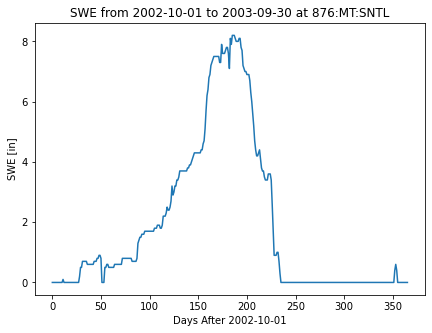

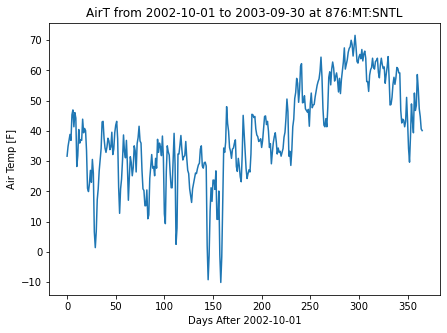

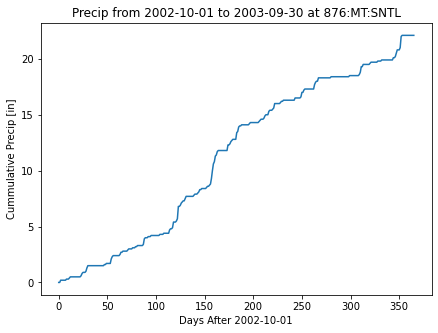

In [75]:
# plot a station (need to fix this)
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(swe_data['SWE [in]'])
ax.set_ylabel('SWE [in]')
ax.set_xlabel(f'Days After {user_beginDate}')
ax.set_title(f'SWE from {user_beginDate} to {user_endDate} at {user_stationTriplets}')

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(swe_data['AirT [F]'])
ax.set_ylabel('Air Temp [F]')
ax.set_xlabel(f'Days After {user_beginDate}')
ax.set_title(f'AirT from {user_beginDate} to {user_endDate} at {user_stationTriplets}')

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(swe_data['PRCP [in]'])
ax.set_ylabel('Cummulative Precip [in]')
ax.set_xlabel(f'Days After {user_beginDate}')
ax.set_title(f'Precip from {user_beginDate} to {user_endDate} at {user_stationTriplets}')